<a href="https://colab.research.google.com/github/victorsponc/cientistas-de-dados-brasil/blob/main/An%C3%A1lise_perfil_cientistas_de_dados_Brasil_Victor_Sponchiado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise do profissional de Ciência de dados no Brasil**

### Utilizaremos a pesquisa realizada pela Data Hackers para explorar o perfil profissional do cientista de dados no Brasil. 
### Os resultados serão apresentados no decorrer do código e também no arquivo - Resultados - no GitHub.

Importando biblioteca Pandas e carregando dados

In [2]:
import pandas as pd

In [4]:
# importar base de dados
uri = 'https://raw.githubusercontent.com/victorsponc/cientistas-de-dados-brasil/main/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(uri)

# exibir as 5 primeiras linhas
dados.head(5)

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [8]:
#tamanho da base
dados.shape

(1765, 170)

Temos 1765 respostas para a pesquisa e 170 perguntas no total.

Quantos cientistas de dados temos? Para responder, vamos analisar os cargos e moldar nossa base.



In [9]:
dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

Vamos tratar como cientistas de dados os seguintes cargos: Data Scientist/Cientista de Dados, Engenheiro de Machine Learning e Estatístico. Os demais grupos não serão analisados. 

In [24]:
#isolando apenas cinetistas de dados
dados = dados[(dados["('D6', 'anonymized_role')"] == "Data Scientist/Cientista de Dados") |
              (dados["('D6', 'anonymized_role')"] == "Engenheiro de Machine Learning") |
              (dados["('D6', 'anonymized_role')"] == "Estatístico")]
  
dados.shape

(193, 170)

Agora temos apenas as cientistas de dados, num total de 193 pessoas, e podemos iniciar nossa análise.

In [25]:
import matplotlib.pyplot as plt

### Análise de idade

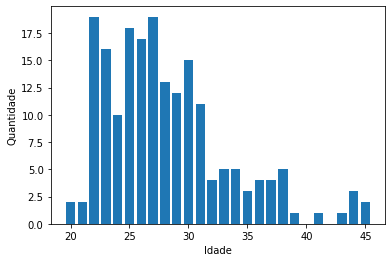

In [60]:
#Alterando título da coluna
dados['idade'] = dados["('P1', 'age')"]

#Histograma - Distribuição
qtd = dados['idade'].value_counts()
X = [int(key) for key in qtd.keys()]
Y = [qtd[key] for key in qtd.keys()]

plt.bar(X, Y)
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.show()

### Análise de Sexo

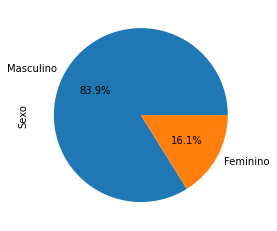

In [42]:
#Alterando título da coluna
dados['Sexo'] = dados["('P2', 'gender')"]

#Qual a distribuição?
dados["Sexo"].value_counts().plot(kind = 'pie', autopct="%1.1f%%")

### Análise de escolaridade

In [57]:
#Alterando título da coluna
dados['Escolaridade'] = dados["('P8', 'degreee_level')"]

#Qtd. por escolaridade
dados['Escolaridade'].value_counts()

Graduação/Bacharelado         62
Mestrado                      43
Pós-graduação                 38
Estudante de Graduação        33
Doutorado ou Phd              11
Não tenho graduação formal     6
Name: Escolaridade, dtype: int64

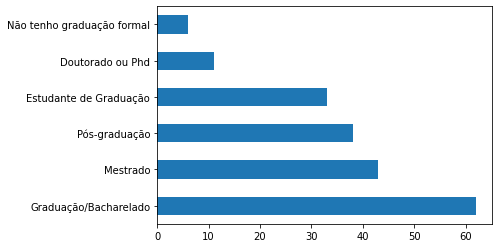

In [58]:
#Distribuição de escolaridade
dados['Escolaridade'].value_counts().plot(kind = 'barh')